#<center>**Άσκηση 1. Επιβλεπόμενη Μάθηση: Ταξινόμηση. Μελέτη datasets του UCI Machine Learning Repository**</center>


###Α. Στοιχεία ομάδας MC25

1.   Νεόφυτος Παπασάββας, ΑΜ: 03115702 
2.   Ειρήνη Παπαδοπούλου, ΑΜ: 03115703




###Β. Εισαγωγή του dataset
1. *Σύντομη παρουσίαση του dataset (τι περιγράφει).* <br>
To dataset μας ονομάζεται **Credit Approval**. Περιέχει εφαρμογές πιστωτικών καρτών. Τα ονόματα των χαρακτηριστικών είναι συμβολικά για να εξασφαλιστεί η προστασία των προσωπικών δεδομένων. Γι' αυτό δεν ξέρουμε ακριβώς τι αντιπροσωπεύει το κάθε χαρακτηριστικό. Περιγράφει περιπτώσεις στις οποίες πιστώθηκε ή χρεώθηκε η κάθε κάρτα.

In [0]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scipy

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.3)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.17.4)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.4.0)


In [0]:
import numpy as np
import pandas as pd
from google.colab import files
#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

df = pd.read_csv("crx.data", na_values=["?"], header=None) 

In [0]:
np_data = df.values
data = np_data[:,0:-1]  # Ξεχωρίζουμε τα data από τις ετικέτες
dataTargets = np_data[:,-1] # Οι ετικέτες
print(df.head())
print(df.shape)
print(df.dtypes) 

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  202.0    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g   43.0  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  280.0  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  100.0    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  120.0    0  +
(690, 16)
0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13    float64
14      int64
15     object
dtype: object


2. *Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;* <br>
Ο αριθμός δειγμάτων είναι 690, τα χαρακτηριστικά τους είναι 15 και το είδος τους είναι **object**, **float64** και **int64**. Πολλά από τα χαρακτηριστικά ενώ είναι κυρίως πχ float64 παίρνουν το είδος object γιατί μερικές τιμές δεν υπάρχουν και στη θέση τους μπαίνει "?". Η τελευταία στήλη είναι οι ετικέτες. Δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά.

3. *Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;* <br>
Τυπώνοντας τις πρώτες 5 γραμμές του αρχείου, παρατηρούμε ότι δεν υπάρχουν ούτε επικεφαλίδες, ούτε αρίθμηση γραμμών.


In [0]:
print(df.values[0:5,:])

[['b' 30.83 0.0 'u' 'g' 'w' 'v' 1.25 't' 't' 1 'f' 'g' 202.0 0 '+']
 ['a' 58.67 4.46 'u' 'g' 'q' 'h' 3.04 't' 't' 6 'f' 'g' 43.0 560 '+']
 ['a' 24.5 0.5 'u' 'g' 'q' 'h' 1.5 't' 'f' 0 'f' 'g' 280.0 824 '+']
 ['b' 27.83 1.54 'u' 'g' 'w' 'v' 3.75 't' 't' 5 't' 'g' 100.0 3 '+']
 ['b' 20.17 5.625 'u' 'g' 'w' 'v' 1.71 't' 'f' 0 'f' 's' 120.0 0 '+']]


4. *Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;* <br>
Οι ετικέτες είναι "+" και "-", βρίσκονται στην τελευταία στήλη και υπάρχουν για να ξεχωρίζουμε κατα πόσο δόθηκε η δεν δόθηκε πίστωση.

In [0]:
# Υπολογίζουμε τον αριθμό δειγμάτων με απουσιάζουσες τιμές
cat crx.data | grep "?" |  wc -l

37


In [0]:
print("Ποσοστό δειγμάτων(γραμμών) με απουσιάζουσες τιμές:", 37/len(data)*100 , "%")

Ποσοστό δειγμάτων(γραμμών) με απουσιάζουσες τιμές: 5.36231884057971 %


5. *Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?* <br>
Δεν υπάρχει αρίθμηση στηλών και γραμμών, τα δεδομένα και τα χαρακτηριστικά τους είναι στις σωστές θέσεις άρα δε χρειάζεται να κάνουμε μετατροπές στο αρχείο.<br>
6. *Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;*<br>
Ναι υπάρχουν, το ποσοστό φαίνεται πιο πάνω.
7. *Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.* <br>

In [0]:
frequencies = pd.value_counts(dataTargets)  # Μετράμε την συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης 
print("Συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης:")
print(frequencies)
print("Ποσοστό '-':", frequencies[0]/len(dataTargets)*100, '%')
print("Ποσοστό '+':", frequencies[1]/len(dataTargets)*100, '%')

Συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης:
-    383
+    307
dtype: int64
Ποσοστό '-': 55.507246376811594 %
Ποσοστό '+': 44.492753623188406 %



<font size="2">Παρατηρούμε ότι έχουμε δύο κλάσεις την **'+'** (πίστωση) και την **'-'**(χρέωση). Τα ποσοστά φαίνονται πιο πάνω και το dataset είναι ισορροπημένο.</font>





8. *Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.* <br>
Παρατηρούμε πιο πάνω ότι το ποσοστό των δειγμάτων με απουσιάζουσες τιμές είναι αρκετά μικρό (~5%) άρα μπορούμε να διαγράψουμε τα δείγματα που έχουν απουσιάζουσες τιμές. Δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά.


In [0]:
#Διαγράφουμε τα δείγματα με απουσιάζουσες τιμές και δημιουργούμε νέο αρχείο χωρίς αυτά (newcrx.data)
cat crx.data | grep -v "?" > newcrx.data

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df = pd.read_csv("newcrx.data", header=None)
np_data = df.values
data = np_data[:,0:-1]  # Ξεχωρίζουμε τα data από τις ετικέτες

# μετατρέπουμε σε dataframe
df2 = pd.DataFrame(data)
# οι κολόνες 0,3,4,5,6,8,9,11,12 έχουν κατηγορικές μεταβλητές. 
# Με την "get_dummies" κάνουμε τη μετατροπή σε binary χαρακτηριστικά που περιγράψαμε
dummies = pd.get_dummies(df2, columns=[0,3,4,5,6,8,9,11,12])
print(dummies)
# Μετατρέπουμε σε αριθμητικές τιμές (pd.to_numeric) και σε numpy array (.values)
data = dummies.apply(pd.to_numeric).values 

labels_df = df.iloc[:, [-1]]
mapping = {'-': 0, '+': 1}
labels_df = labels_df.replace(mapping)
# μετατρέπουμε το dataframe σε μονοδιάστατο array
data_labels = labels_df.values.flatten()
train, test, train_labels, test_labels = train_test_split(data, data_labels, test_size=0.20)

         1       2     7 10   13   14  ...  9_t  11_f  11_t  12_g  12_p  12_s
0    30.83       0  1.25  1  202    0  ...    1     1     0     1     0     0
1    58.67    4.46  3.04  6   43  560  ...    1     1     0     1     0     0
2     24.5     0.5   1.5  0  280  824  ...    0     1     0     1     0     0
3    27.83    1.54  3.75  5  100    3  ...    1     0     1     1     0     0
4    20.17   5.625  1.71  0  120    0  ...    0     1     0     0     0     1
..     ...     ...   ... ..  ...  ...  ...  ...   ...   ...   ...   ...   ...
648  21.08  10.085  1.25  0  260    0  ...    0     1     0     1     0     0
649  22.67    0.75     2  2  200  394  ...    1     0     1     1     0     0
650  25.25    13.5     2  1  200    1  ...    1     0     1     1     0     0
651  17.92   0.205  0.04  0  280  750  ...    0     1     0     1     0     0
652     35   3.375  8.29  0    0    0  ...    0     0     1     1     0     0

[653 rows x 46 columns]


##Γ. Baseline classification
1. *Εκπαιδεύστε στο train τους classifiers με default τιμές (απλή αρχικοποίηση). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.*



In [0]:
#Dummy Classifiers

from sklearn.dummy import DummyClassifier

#Δημιουργία - ορισμός των dummy classifiers
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)  
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)  
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

pred = {} #Εδώ θα αποθηκεύσουμε όλες τις εκτιμήσεις των classifiers

#με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
model = dc_uniform.fit(train, train_labels)
pred['uniform (random)'] = dc_uniform.predict(test)
model = dc_constant_0.fit(train, train_labels)
pred['constant 0'] = dc_constant_0.predict(test)
model = dc_constant_1.fit(train, train_labels)
pred['constant 1'] = dc_constant_1.predict(test)
model = dc_most_frequent.fit(train, train_labels)
pred['most frequent label'] = dc_most_frequent.predict(test)
model = dc_stratified.fit(train, train_labels)
pred['stratified'] = dc_stratified.predict(test)

In [0]:
#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train, train_labels)
#Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
pred['knn'] = knn.predict(test)

In [0]:
#Yπολογισμός των f1 micro και macro average, confusion matrix 
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix

classification_scores_micro = []
classification_scores_macro = []
classification_rep_micro =[]
classification_rep_macro =[]
micro_avg_f1 = []
macro_avg_f1 = [] 
classifiers = []
for classifier, pred in pred.items():
    # υπολογισμός του confusion matrix για κάθε estimator
    cnf_matrix = confusion_matrix(test_labels, pred)
    print("Confusion Matrix",classifier, "\n",cnf_matrix)
    # εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων (globaly)) τα δείγματα (average = micro).
    avg = precision_recall_fscore_support(test_labels, pred, average='micro', zero_division= 0)
    micro_avg_f1.append(avg[2])
    classification_scores_micro.append(avg)
    classification_rep_micro.append(classification_report(test_labels, pred))
    print(classifier, " - micro: ", avg[2])
    # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
    avg = precision_recall_fscore_support(test_labels, pred, average='macro', zero_division= 0)
    macro_avg_f1.append(avg[2])
    classification_scores_macro.append(avg)
    print(classifier, " - macro: ", avg[2], "\n")
    classifiers.append(classifier)
    classification_rep_macro.append(classification_report(test_labels, pred))
  
#Αποθηκεύω τις αρχικές αποδόσεις γιατί θα τις χρειαστούμε αργότερα
f1_first_micro = micro_avg_f1[-1]
f1_first_macro = macro_avg_f1[-1]

Confusion Matrix uniform (random) 
 [[35 36]
 [27 33]]
uniform (random)  - micro:  0.5190839694656488
uniform (random)  - macro:  0.5189718482252141 

Confusion Matrix constant 0 
 [[71  0]
 [60  0]]
constant 0  - micro:  0.5419847328244275
constant 0  - macro:  0.35148514851485146 

Confusion Matrix constant 1 
 [[ 0 71]
 [ 0 60]]
constant 1  - micro:  0.4580152671755725
constant 1  - macro:  0.31413612565445026 

Confusion Matrix most frequent label 
 [[71  0]
 [60  0]]
most frequent label  - micro:  0.5419847328244275
most frequent label  - macro:  0.35148514851485146 

Confusion Matrix stratified 
 [[41 30]
 [39 21]]
stratified  - micro:  0.4732824427480916
stratified  - macro:  0.4607123679971362 

Confusion Matrix knn 
 [[57 14]
 [25 35]]
knn  - micro:  0.7022900763358778
knn  - macro:  0.6936499370390359 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Για κάθε averaged metric, εκτυπώστε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.


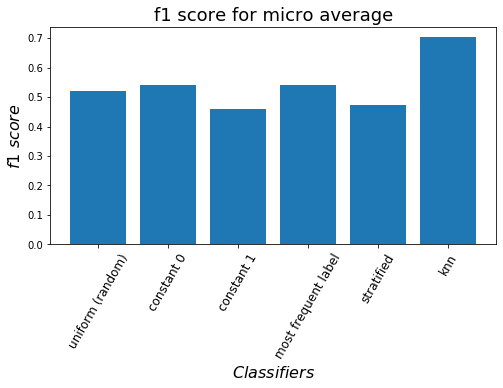

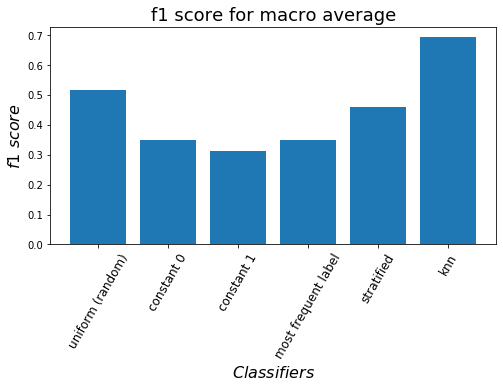

In [0]:
import matplotlib.pyplot as plt

# classifiers = list(spam_pred.keys())

y = np.arange(len(classifiers))

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,4)

plt.bar(y, micro_avg_f1, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for micro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

print("\n")

#Bar for f1-macro average
fig2, ax2 = plt.subplots()
fig2.set_size_inches(8,4)

plt.bar(y, macro_avg_f1, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for macro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

3. Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης. <br> 
Αρχικά επισημαίνουμε ότι κάθε γραμμή ενός confusion matrix αντιστοιχίζεται σε μία κατηγορία ετικετών ('+' και '-'). Τα στοιχεία εκτός διαγωνίου σε κάθε γραμμή είναι **false negative**, δηλαδή δεν κατηγοριοποιήθηκαν στην κατηγορία της γραμμής ενώ ανήκαν. Άρα με παρατήρηση των γραμμών εξετάζω το recall. Αντίστοιχα, κάθε στήλη ενός confusion matrix αντιστοιχίζεται επίσης σε μία κατηγορία ετικετών. Τα στοιχεία εκτός διαγωνίου σε κάθε στήλη είναι **false positive**, δηλαδή κατηγοριοποιήθηκαν στην κατηγορία της στήλης ενώ δεν ανήκαν. Άρα με παρατήρηση των στηλών εξετάζω το precision.<br>

* **uniform (random)**: Στον πίνακα υπάρχουν μη μηδενικές (αλλά και υψηλές) 
τιμές στα κελιά εκτός διαγωνίου κάτι που μας εκφράζει κακό recall και precision. Ο λόγος είναι καθαρά η σχεδίαση του ταξινομητή ο οποίος ταξινομεί τυχαία, με ομοιόμορφη πιθανότητα τα δείγματα του test set σε κλάσεις. <br>
* **constant_x**: Σε κάθε πίνακα constant_x όλα τα δείγματα έχουν ταξινομηθεί στην κλάση x και γι' αυτό οι μόνες μη μηδενικες τιμές στον πίνακα είναι η στήλη x. Αυτό μας δίνει κακό precision και recall σε όλες τις κλάσεις εκτός της κλάσης x όπου το precision αναμένεται πολύ μικρό αλλά το recall αναμένεται μέγιστο, δηλαδή 1. Π.χ., στον πίνακα του contant_1 η γραμμή 1 έχει μηδενικά όλα τα στοιχεία εκτός διαγωνίου (βέλτιστο recall), ενώ η στήλη 1 έχει παντού μη μηδενικά στοιχεία (κακό precision).<br>
* **most frequent label**: Ο ταξινομητής αυτός είναι ίδιος με τον  constant_x, όπου x είναι η πιο συχνά εμφανιζόμενη κλάση στο train set. Επομένως ίσχυουν τα ίδια σχόλια με πριν. Μπορούμε να πούμε ότι αυτός ο ταξινομητής είναι ό,τι καλύτερο μπορεί να πετύχει ένας constant ταξινομητής.<br>
* **stratified** :Στον πίνακα υπάρχουν μη μηδενικές (αλλά και υψηλές) τιμές στα κελιά εκτός διαγωνίου κάτι που μας εκφράζει κακό recall και precision. Ο λόγος είναι καθαρά η σχεδίαση του ταξινομητή ο οποίος ταξινομεί με βάση τη συχνότητα εμφάνισης των δειγμάτων στις κλάσεις στο train set, δηλαδή περίπου 54-46.<br>
* **knn** :Συνολικά είναι καλύτερος σε όλα σε σχέση με όλους τους προηγούμενους. H ταξινόμηση είναι ικανοποιητική, αν λάβουμε και υπόψιν ότι η υπερπαράμετρος k έχει επιλεγεί τυχαία και δεν έχει υπολογισθεί η βέλτιστη. Η σχεδίαση του knn δίνει γενικά καλά αποτελέσματα λόγω του ότι βασίζεται σε μία πιο αλγοριθμική προσέγγιση και καθορίζεται από τη συμπεριφορά των γειτονικών δειγμάτων. <br> 

###Δ. Βελτιστοποίηση ταξινομητών


1. *Για κάθε ταξινομητή βελτιστοποιήστε την απόδοσή του στο training set μέσω της διαδικασίας προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων (δεν έχουν όλοι οι ταξινομητές υπερπαραμέτρους). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.* <br>
Θα ακολουθήσουμε τα βήματα επιλογή χαρακτηριστικών, κανονικοποίηση και στο τέλος τον ταξινομητή. Ο λόγος που δεν χρησιμοποιούμε το PCA για feature extraction είναι επειδή μετά την επιλογή χαρακτηριστικών βάζοντας το σωστό κατόφλι παίρνουμε πολύ πιο λίγα χαρακτηριστικά. Ως αποτέλεσμα ο αριθμός των δειγμάτων είναι πολύ μεγαλύτερος από τον αριθμό των χαρακτηριστικών και δεν χρειάζεται να μειώσουμε την διαστατικότητα. <br>
Για να υπολογίσουμε τη τιμή του κατοφλίου που μας δίνει το βέλτιστο αποτέλεσμα για **f1 micro και macro** κάναμε δοκιμές με διάφορες τιμές και καταλήξαμε στο 0.1 που είχε την καλύτερη απόδοση.


In [0]:
# Επιλογή χαρακτηριστικών με Variance Threshold
# Για να καταλάβουμε τι τιμές μπορούμε να δοκιμάζουμε στο κατώφλι πρέπει να δούμε τη διακύμανση όλων των μεταβλητών:
train_var = np.var(train, axis=0)
print(train_var)
print(train.shape)
print(test.shape)
print("max variance: ", np.max(train_var))
print("min variance: ", np.min(train_var))

[1.26974293e+02 2.41984641e+01 1.18469312e+01 2.58092549e+01
 2.85326022e+04 3.36399448e+07 2.15469532e-01 2.15469532e-01
 3.81673786e-03 1.81118891e-01 1.79093084e-01 1.81118891e-01
 3.81673786e-03 1.79093084e-01 7.07564481e-02 1.56049530e-01
 6.42092747e-02 4.38631259e-02 3.50736190e-02 6.25541316e-02
 7.55897594e-02 1.69441141e-02 6.25541316e-02 6.25541316e-02
 1.10450522e-01 3.81673786e-03 8.66105900e-02 4.90487515e-02
 7.71861834e-02 7.60411620e-03 6.74975411e-02 1.69613629e-01
 1.32301346e-02 5.71409697e-03 3.81673786e-03 2.42568371e-01
 9.48679555e-03 2.48810939e-01 2.48810939e-01 2.47122767e-01
 2.47122767e-01 2.48223749e-01 2.48223749e-01 7.71861834e-02
 1.91203887e-03 7.55897594e-02]
(522, 46)
(131, 46)
max variance:  33639944.769747905
min variance:  0.0019120388720071547


In [0]:
# Επιλογή χαρακτηριστικών με Variance Threshold
from sklearn.feature_selection import VarianceThreshold

# αρχικοποιούμε έναν selector
selector = VarianceThreshold(threshold=0.1)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
# φτιάχνουμε μια μάσκα που μας λέει αν ο selector κρατάει ένα χαρακτηριστικό ή όχι
mask = selector.get_support()
test_reduced = selector.transform(test)
print(test_reduced.shape)
print(train_reduced.shape)

(131, 22)
(522, 22)


In [0]:
# Κανονικοποίηση χαρακτηριστικών με τη χρήση standar score
from sklearn import preprocessing

# standardization των features του training set
train_scaled = preprocessing.scale(train_reduced)
# μέση τιμη και απόκλιση των scaled χαρακτηριστικών
print("Μέση τιμή των κανονικοποιημένων χαρακτηριστικών του train set")
print(train_scaled.mean(axis=0))
print("Απόκλιση των κανονικοποιημένων χαρακτηριστικών του train set")
print(train_scaled.std(axis=0))


Μέση τιμή των κανονικοποιημένων χαρακτηριστικών του train set
[-2.48417719e-16  5.78507017e-17  3.40298245e-18  1.36119298e-17
 -8.16715788e-17 -1.02089474e-17  3.57313157e-17 -3.57313157e-17
 -6.29551753e-17  5.10447368e-17 -6.29551753e-17  5.10447368e-17
  1.27611842e-17  1.70149123e-18  2.55223684e-17  1.58238684e-16
  1.15701403e-16  5.44477192e-17 -2.89253508e-17  2.89253508e-17
 -2.72238596e-17  2.72238596e-17]
Απόκλιση των κανονικοποιημένων χαρακτηριστικών του train set
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
# όριζουμε ένα αντικείμενο scaler και το κάνουμε fit στο train set
scaler = preprocessing.StandardScaler().fit(train_reduced)
# εφαρμόζουμε τον scaler στα δεδομένα test.
test_scaled = scaler.transform(test_reduced)

# και τυπώνουμε τη μέση τιμή και απόκλιση του test set 
print("Μέση τιμή των κανονικοποιημένων χαρακτηριστικών του test set")
print(test_scaled.mean(axis=0))
print("Απόκλιση των κανονικοποιημένων χαρακτηριστικών του test set")
print(test_scaled.std(axis=0))

Μέση τιμή των κανονικοποιημένων χαρακτηριστικών του test set
[ 0.21648968  0.05256117 -0.04929469 -0.00902419  0.07297574 -0.08654749
 -0.03547347  0.03547347  0.02006731 -0.01112691  0.02006731 -0.01112691
  0.12856766 -0.17372066 -0.080781   -0.02779182  0.00026386 -0.00026386
  0.06868924 -0.06868924 -0.04628798  0.04628798]
Απόκλιση των κανονικοποιημένων χαρακτηριστικών του test set
[1.21290778 1.10039072 0.88753932 0.88072894 0.97554584 0.30381387
 0.98505842 0.98505842 0.98734321 0.99291166 0.98734321 0.99291166
 1.08765224 0.76110748 0.93928166 1.00446837 1.00001821 1.00001821
 0.99018095 0.99018095 1.00284028 1.00284028]


In [0]:
from sklearn.metrics import precision_recall_fscore_support
#Υλοποίηση cross validation χωρίς τη χρήση έτοιμων συναρτήσεων
#Χωρίζουμε το dataset σε 10-folds
folds = []
folds_labels = []
instansces_per_fold = int(train_scaled.shape[0]/10)
additional_instances = train_scaled.shape[0] % 10

for i in range(0,10):
  folds.append(train_scaled[i*instansces_per_fold:(i+1)*instansces_per_fold,:])
  folds_labels.append(train_labels[i*instansces_per_fold:(i+1)*instansces_per_fold])

# φτιάχνουμε μια λίστα από το 1 έως το instansces_per_fold
myList = list(range(1,instansces_per_fold))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))

f1_micro_cv_scores = []
f1_macro_cv_scores = []
avg_micro_list = []
avg_macro_list = []
#Κάνουμε 10-fold cross validation
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  for i in range(0,10):
    for j in range(0,10):
      if j != i:
        knn.fit(folds[j], folds_labels[j])    
    #Αποθηκεύουμε την τιμή της στον πίνακά μας με βάση το f1 micro και το f1 macro
    knn_predict = knn.predict(folds[i])
    avg_micro = precision_recall_fscore_support(folds_labels[i], knn_predict, average='micro', zero_division=0)
    avg_micro_list.append(avg_micro[2])
    avg_macro = precision_recall_fscore_support(folds_labels[i], knn_predict, average='macro', zero_division=0)
    avg_macro_list.append(avg_micro[2])
  f1_micro_cv_scores.append(np.mean(avg_micro_list))
  f1_macro_cv_scores.append(np.mean(avg_macro_list))

2. *Για το τελικό fit του κάθε ταξινομητή στο σύνολο του training set και για το predict στο test set εκτυπώστε πίνακες με τους χρόνους εκτέλεσης.*

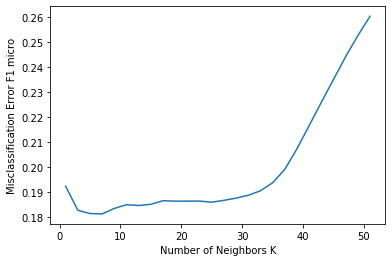

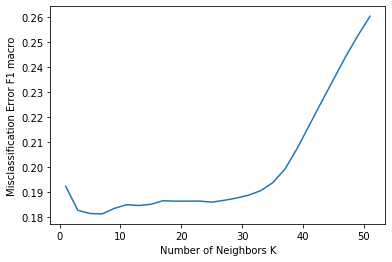

The optimal number of neighbors (calculated in the training set with metric F1 micro) is 7
The optimal number of neighbors (calculated in the training set with metric F1 macro) is 7

Optimal f1 micro score on the test set is 0.8320610687022901 with k= 7

Optimal f1 macro score on the test set is 0.8291844476055003 with k= 7

Συνολικός χρόνος fit στο train set για micro: 0.0018367767333984375 seconds
Συνολικός χρόνος predict στο test set για micro: 0.011526346206665039 seconds
Συνολικός χρόνος fit στο train set για macro: 0.0012426376342773438 seconds
Συνολικός χρόνος predict στο test set για macro: 0.0070095062255859375 seconds


In [0]:
import time
from sklearn.metrics import precision_recall_fscore_support

# το σφάλμα είναι το αντίστροφο της πιστότητας
mean_error_micro = [1 - x for x in f1_micro_cv_scores]
mean_error_macro = [1 - x for x in f1_macro_cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, mean_error_micro)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error F1 micro')
plt.show()

plt.plot(neighbors, mean_error_macro)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error F1 macro')
plt.show()

# determining best k
optimal_k_micro = neighbors[mean_error_micro.index(min(mean_error_micro))]
print("The optimal number of neighbors (calculated in the training set with metric F1 micro) is %d" % optimal_k_micro)
optimal_k_macro = neighbors[mean_error_macro.index(min(mean_error_macro))]
print("The optimal number of neighbors (calculated in the training set with metric F1 macro) is %d" % optimal_k_macro)

train_time =[]
test_time = []
# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set για F1 micro
knn = KNeighborsClassifier(n_neighbors = optimal_k_micro)
train_start_time = time.time()
knn.fit(train_scaled, train_labels)
train_time.append(time.time()-train_start_time)
test_start_time = time.time()
pred_micro = knn.predict(test_scaled)
test_time.append(time.time()-test_start_time)
f1_micro = precision_recall_fscore_support(test_labels, pred_micro, average='micro', zero_division=0)
print("\nOptimal f1 micro score on the test set is", f1_micro[2], "with k=", optimal_k_micro)


# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set για F1 macro
knn = KNeighborsClassifier(n_neighbors = optimal_k_macro)
train_start_time = time.time()
knn.fit(train_scaled, train_labels)
train_time.append(time.time()-train_start_time)
test_start_time = time.time()
pred_macro = knn.predict(test_scaled)
test_time.append(time.time()-test_start_time)
f1_macro = precision_recall_fscore_support(test_labels, pred_macro, average='macro', zero_division=0)
print("\nOptimal f1 macro score on the test set is", f1_macro[2], "with k=", optimal_k_macro)

print("\nΣυνολικός χρόνος fit στο train set για micro: %s seconds" % (train_time[0]))
print("Συνολικός χρόνος predict στο test set για micro: %s seconds" % (test_time[0]))
print("Συνολικός χρόνος fit στο train set για macro: %s seconds" % (train_time[1]))
print("Συνολικός χρόνος predict στο test set για macro: %s seconds" % (test_time[1]))

3. *Για κάθε averaged metric, εκτυπώστε bar plot σύγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.*


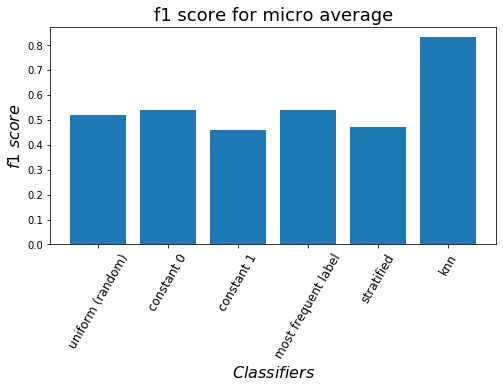

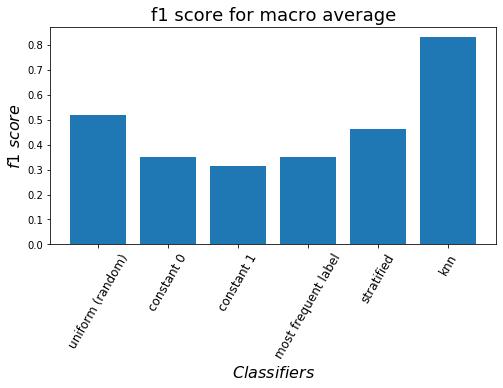

In [0]:
import matplotlib.pyplot as plt

# classifiers = list(spam_pred.keys())

y = np.arange(len(classifiers))

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,4)

micro_avg_f1[-1] = f1_micro[2]
plt.bar(y, micro_avg_f1, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for micro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

print("\n")

#Bar for f1-macro average
fig2, ax2 = plt.subplots()
fig2.set_size_inches(8,4)

macro_avg_f1[-1] = f1_macro[2]
plt.bar(y, macro_avg_f1, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for macro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

4. *Τυπώστε πίνακα με τη μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους.*


In [0]:
f1_progress = [[f1_first_macro, f1_first_micro],[f1_macro[2], f1_micro[2]]]
pd.DataFrame(f1_progress, columns=["f1 macro score ", "f1 micro score"], index = ["before", "after"])

,f1 macro score,f1 micro score
before,0.693650,0.702290
after,0.829184,0.832061


5. *Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης, τη μεταβολή της απόδοσης και τους χρόνους εκτέλεσης.*<br>


In [0]:
f1 = []
cnf_matrix_micro = confusion_matrix(test_labels, pred_micro)
cnf_matrix_macro = confusion_matrix(test_labels, pred_micro)
f1_micro = precision_recall_fscore_support(test_labels, pred_micro, average='micro')
f1_macro = precision_recall_fscore_support(test_labels, pred_macro, average='macro')
f1.append(f1_macro)
f1.append(f1_micro)
print("Confusion matrix for f1 micro")
print(cnf_matrix_micro)
print("Confusion matrix for f1 macro")
print(cnf_matrix_macro)
pd.DataFrame(f1, columns=["Precision", "Recall", "Fscore", "Support"], index = ["micro","macro"])


Confusion matrix for f1 micro
[[63  8]
 [14 46]]
Confusion matrix for f1 macro
[[63  8]
 [14 46]]


,Precision,Recall,Fscore,Support
micro,0.835017,0.826995,0.829184,None
macro,0.832061,0.832061,0.832061,None


Όσο αφορά τα plots παρατηρούμε τη βελτίωση του knn σε σύγκριση με τα προηγούμενα plots και για τα δύο metrics (micro και macro). Οι άλλοι ταξινομητές(dummies) βγάζουν τα ίδια αποτελέσματα όπως είναι αναμενόμενο. <br>
Όσο αφορά τις τιμές precision, recall και f1 των πινάκων σύγχισης παρατηρούμε ότι και αυτές βελτιώνονται. Πιο συγκεκριμένα τώρα έχουμε λιγότερα false negatives και false positives άρα έχουμε καλύτερο precision και recall και για τις δύο κλάσεις. Παρατηρούμε βελτίωση στην απόδοση του knn ταξινομητή της τάξης του 15%.
Επίσης βλέπουμε ότι ο χρόνος εκπαίδευσης και πρόβλεψης είναι πολύ μικροί (της τάξης των ms). Αυτό οφείλεται στο ότι τα δεδομένα είναι πολύ λίγα ήδη από το στάδιο της προεπεξεργασίας. <br>
Γενικά τα δύο averaged metrics (micro και macro) βγάζουν πολύ κοντινά αποτελέσματα με πολύ μικρές διαφορές μεταξύ τους, ουσιαστικά ασήμαντες.